In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
df = pd.read_csv("tech_companies_salary.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [33]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [34]:
df.tail()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN
62641,1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0.0,0.0,ML / AI,155000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

In [36]:
df.nunique()

timestamp                  61755
company                     1631
level                       2915
title                         15
totalyearlycompensation      893
location                    1050
yearsofexperience             65
yearsatcompany                81
tag                         3057
basesalary                   482
stockgrantvalue              612
bonus                        335
gender                         4
otherdetails               12838
cityid                      1045
dmaid                        149
rowNumber                  62642
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
Race                           5
Education                      5
dtype: int64

In [37]:
df.duplicated().value_counts()

False    62642
Name: count, dtype: int64

In [38]:
df.shape

(62642, 29)

In [39]:
df.size

1816618

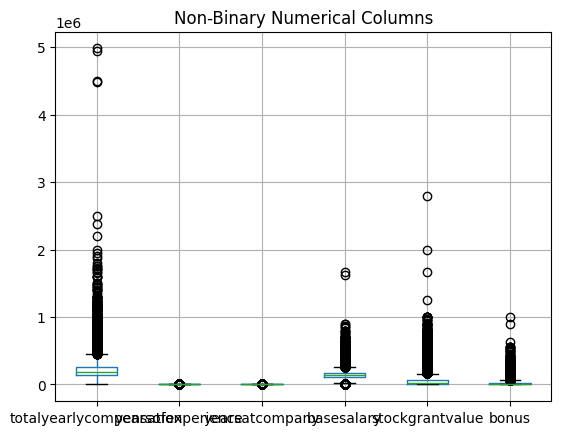

In [40]:
df.boxplot(column = ["totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus"])
plt.title("Non-Binary Numerical Columns")
plt.show()

In [41]:
#cleaning dataset
dfclean = df[(df["totalyearlycompensation"] < 340000) & (df["yearsofexperience"] < 17.5) & (df["yearsatcompany"] < 7.5) & ((df["basesalary"] < 220000)&(df["basesalary"] > 35000) ) & (df["stockgrantvalue"] < 110000) & (df["bonus"] < 46000)]

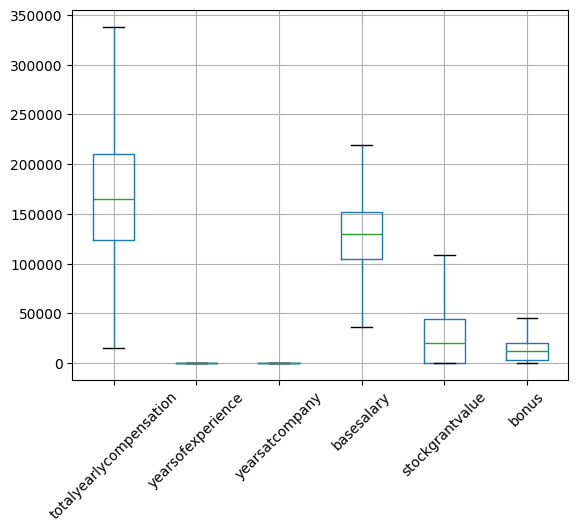

In [42]:
#boxplot of cleaned dataset
dfclean.boxplot(column=["totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus"])
plt.xticks(rotation=45)
plt.show()

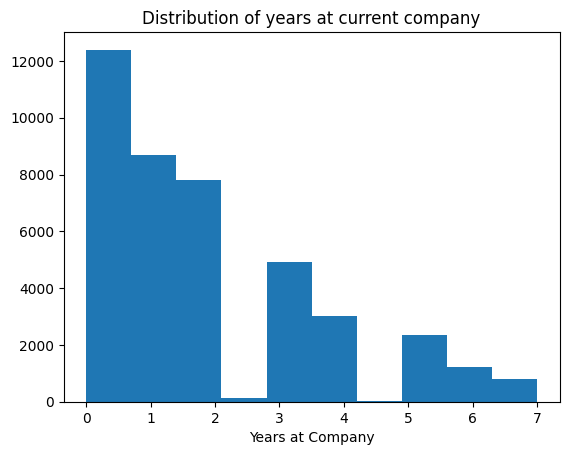

In [43]:
x = dfclean['yearsatcompany']
plt.hist(x)
plt.xlabel('Years at Company')
plt.title("Distribution of years at current company")
plt.show()

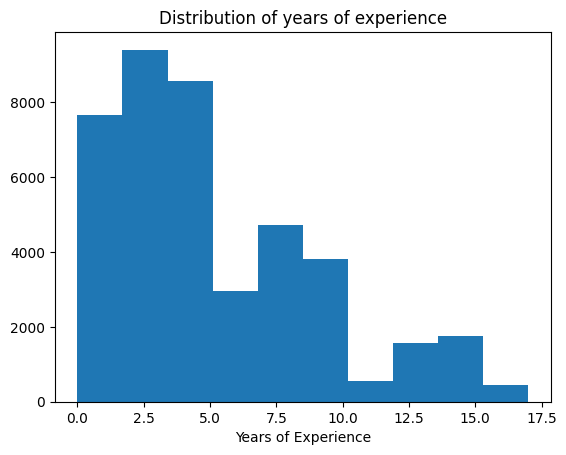

In [44]:
x = dfclean['yearsofexperience']
plt.hist(x)
plt.xlabel('Years of Experience')
plt.title("Distribution of years of experience")
plt.show()

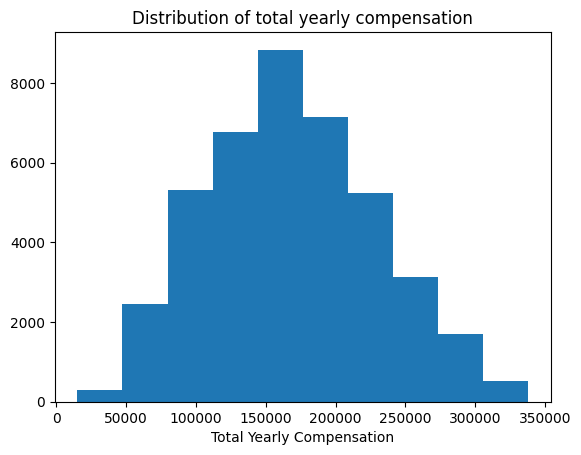

In [45]:
x = dfclean['totalyearlycompensation']
plt.hist(x)
plt.xlabel('Total Yearly Compensation')
plt.title("Distribution of total yearly compensation")
plt.show()

In [65]:
encodedData = pd.get_dummies(dfclean, columns=['gender'], prefix='gender', dtype=int)
encodedData.sample(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,gender_Female,gender_Male,gender_Other,gender_Title: Senior Software Engineer
38851,01-07-2021 08:57,Microsoft,60,Software Engineer,125000,"Bellevue, WA",2.0,2.0,Full Stack,115000,...,1,0,0,0,White,Bachelor's Degree,1,0,0,0
22955,6/23/2020 7:30:06,Twilio,Program Manager,Technical Program Manager,167000,"Denver, CO",8.0,3.0,Security,132000,...,0,0,0,0,NaN,NaN,0,1,0,0
49020,4/21/2021 0:44:05,Amazon,L6 SDM,Management Consultant,223000,"Mexico, DF, Mexico",16.0,0.0,Vender management,150000,...,0,0,0,1,Hispanic,Master's Degree,0,1,0,0
39871,1/20/2021 18:03:57,Workday,P3,Software Engineer,200000,"Pleasanton, CA",4.0,4.0,API Development (Back-End),130000,...,0,0,0,0,NaN,NaN,0,0,0,0
35525,11/18/2020 13:26:48,KPMG,Associate,Software Engineer,86000,"Atlanta, GA",4.0,2.0,ML / AI,86000,...,0,0,0,0,NaN,Master's Degree,0,0,0,0


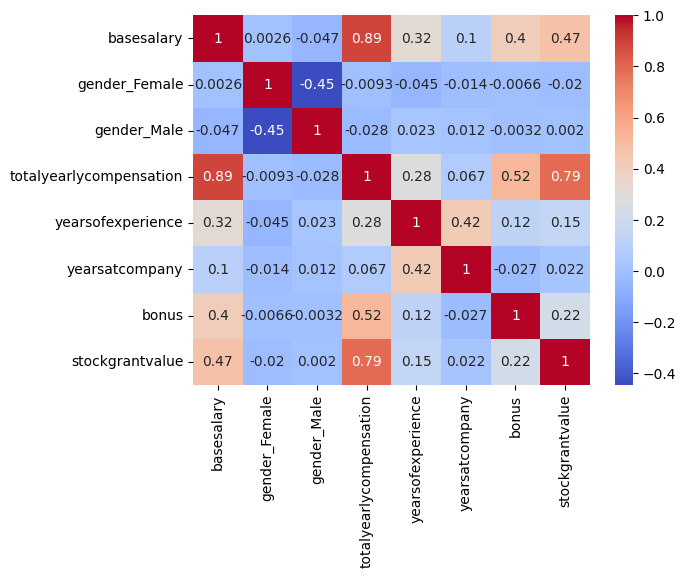

In [68]:

correlationMatrix = encodedData[['basesalary', 'gender_Female', 'gender_Male', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'bonus', 'stockgrantvalue']].corr()

sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()